# City of Los Angeles Crime Data from 2020 to Present

Dataset is from LOS ANGELES OPEN DATA. You can access the official website with this link:  https://data.lacity.org/

Los Angeles Police Department. “Crime Data from 2020 to Present.” Public Safety | Los Angeles - Open Data Portal, 11 Oct. 2023, https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8 

In [1]:
# Import necessary libraries

import requests

import pandas as pd # Import pandas for data manipulation

In [9]:
# You can access the dataset here: https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8

# API endpoint URL
api_url = 'https://data.lacity.org/resource/2nrs-mtv8.json'

# Make an API request

response = requests.get(api_url)

# Check the status code to ensure the request was successful 
if response.status_code == 200:
    data = response.json() # Parse JSON data
    crime = pd.DataFrame(data) # Convert JSON data to a DataFrame
else:
    print(f'Failed to retrieve data. Status code:{response.status_code}')

In [10]:
# Display the first few rows of the 'crime' DataFrame to get a quick look at the data

crime.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,location,lat,lon,crm_cd_2,cross_street
0,010304468,2020-01-08T00:00:00.000,2020-01-08T00:00:00.000,2230,03,Southwest,0377,2,624,BATTERY - SIMPLE ASSAULT,...,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624,1100 W 39TH PL,34.0141,-118.2978,NaN,NaN
1,190101086,2020-01-02T00:00:00.000,2020-01-01T00:00:00.000,0330,01,Central,0163,2,624,BATTERY - SIMPLE ASSAULT,...,500,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624,700 S HILL ST,34.0459,-118.2545,NaN,NaN
2,200110444,2020-04-14T00:00:00.000,2020-02-13T00:00:00.000,1200,01,Central,0155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,NaN,NaN,AA,Adult Arrest,845,200 E 6TH ST,34.0448,-118.2474,NaN,NaN
3,191501505,2020-01-01T00:00:00.000,2020-01-01T00:00:00.000,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,NaN,NaN,IC,Invest Cont,745,5400 CORTEEN PL,34.1685,-118.4019,998,NaN
4,191921269,2020-01-01T00:00:00.000,2020-01-01T00:00:00.000,0415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,NaN,IC,Invest Cont,740,14400 TITUS ST,34.2198,-118.4468,NaN,NaN


## Description of Columns in this Dataset:

DR_NO: Unique incident identifier.

Date Rptd: Date when the incident was reported.

DATE OCC: Date when the incident occurred.

TIME OCC: Time of day when the incident occurred.

AREA: Numeric code indicating the incident area.

AREA NAME: Name of the incident area.

Rpt Dist No: Reporting district within the area.

Part 1-2: Classification of the incident as Part 1 or Part 2 crime.

Crm Cd: Numeric code for the type of crime.

Crm Cd Desc: Description of the crime.

Mocodes: Codes describing the modus operandi of the crime.

Vict Age, Vict Sex, Vict Descent: Victim demographics.

Premis Cd: Numeric code for the incident location.

Premis Desc: Description of the incident location.

Weapon Used Cd: Code indicating weapon use.

Weapon Desc: Description of the weapon used.

Status: Incident status.

Status Desc: Description of the incident status.

Crm Cd 1-4: Additional related crime codes.

LOCATION: Approximate incident location.

Cross Street: Nearest cross street.

LAT: Latitude coordinate.

LON: Longitude coordinate.

In [11]:
# Generate statistical summary for all columns in the 'crime' DataFrame, including non-numeric ones

crime.describe(include='all')

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,location,lat,lon,crm_cd_2,cross_street
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,389,389,1000,1000,1000,1000,1000,1000,76,256
unique,1000,201,173,275,21,21,223,2,64,64,...,30,30,4,4,64,525,369,413,9,113
top,010304468,2020-01-26T00:00:00.000,2020-01-11T00:00:00.000,1200,01,Central,0162,1,330,BURGLARY FROM VEHICLE,...,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,330,700 W 7TH ST,34.0480,-118.2577,998,LOS ANGELES
freq,1,47,42,38,794,794,90,584,127,127,...,224,224,834,834,127,34,36,34,63,13


In [12]:
# Display information about the 'crime' DataFrame, including data types and non-null counts
# This is useful for understanding the dataset's structure and checking for missing values

crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   dr_no           1000 non-null   object
 1   date_rptd       1000 non-null   object
 2   date_occ        1000 non-null   object
 3   time_occ        1000 non-null   object
 4   area            1000 non-null   object
 5   area_name       1000 non-null   object
 6   rpt_dist_no     1000 non-null   object
 7   part_1_2        1000 non-null   object
 8   crm_cd          1000 non-null   object
 9   crm_cd_desc     1000 non-null   object
 10  mocodes         928 non-null    object
 11  vict_age        1000 non-null   object
 12  vict_sex        936 non-null    object
 13  vict_descent    936 non-null    object
 14  premis_cd       1000 non-null   object
 15  premis_desc     1000 non-null   object
 16  weapon_used_cd  389 non-null    object
 17  weapon_desc     389 non-null    object
 18  status   

In [14]:
# Convert the columns in the 'crime' DataFrame to the correct data type
crime['date_rptd'] = crime['date_rptd'].astype('datetime64[ns]')
crime['date_occ'] = crime['date_occ'].astype('datetime64[ns]')

In [ ]:
# Convert 'TIME OCC' column to string type
crime['time_occ'] = crime['time_occ'].astype(str)

# Ensure all times are of length 4, filling with leading zeroes if necessary
crime['time_occ'] = crime['time_occ'].str.zfill(4)

# Insert a colon ':' between hours and minutes
crime['time_occ'] = crime['time_occ'].str.replace(r'(\d{2})(\d{2})', r'\1:\2', regex=True)


In [15]:
# Display info after conversion
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   dr_no           1000 non-null   object        
 1   date_rptd       1000 non-null   datetime64[ns]
 2   date_occ        1000 non-null   datetime64[ns]
 3   time_occ        1000 non-null   object        
 4   area            1000 non-null   object        
 5   area_name       1000 non-null   object        
 6   rpt_dist_no     1000 non-null   object        
 7   part_1_2        1000 non-null   object        
 8   crm_cd          1000 non-null   object        
 9   crm_cd_desc     1000 non-null   object        
 10  mocodes         928 non-null    object        
 11  vict_age        1000 non-null   object        
 12  vict_sex        936 non-null    object        
 13  vict_descent    936 non-null    object        
 14  premis_cd       1000 non-null   object        
 15  premi

In [16]:
crime.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,location,lat,lon,crm_cd_2,cross_street
0,010304468,2020-01-08,2020-01-08,2230,03,Southwest,0377,2,624,BATTERY - SIMPLE ASSAULT,...,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624,1100 W 39TH PL,34.0141,-118.2978,NaN,NaN
1,190101086,2020-01-02,2020-01-01,0330,01,Central,0163,2,624,BATTERY - SIMPLE ASSAULT,...,500,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624,700 S HILL ST,34.0459,-118.2545,NaN,NaN
2,200110444,2020-04-14,2020-02-13,1200,01,Central,0155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,NaN,NaN,AA,Adult Arrest,845,200 E 6TH ST,34.0448,-118.2474,NaN,NaN
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,NaN,NaN,IC,Invest Cont,745,5400 CORTEEN PL,34.1685,-118.4019,998,NaN
4,191921269,2020-01-01,2020-01-01,0415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,NaN,IC,Invest Cont,740,14400 TITUS ST,34.2198,-118.4468,NaN,NaN


In [17]:
# Generate statistical summary for all columns in the 'crime' DataFrame, including non-numeric ones

crime.describe(include='all')

/tmp/ipykernel_378060/3058569126.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  crime.describe(include='all')
/tmp/ipykernel_378060/3058569126.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  crime.describe(include='all')


,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,location,lat,lon,crm_cd_2,cross_street
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,389,389,1000,1000,1000,1000,1000,1000,76,256
unique,1000,201,173,275,21,21,223,2,64,64,...,30,30,4,4,64,525,369,413,9,113
top,010304468,2020-01-26 00:00:00,2020-01-11 00:00:00,1200,01,Central,0162,1,330,BURGLARY FROM VEHICLE,...,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,330,700 W 7TH ST,34.0480,-118.2577,998,LOS ANGELES
freq,1,47,42,38,794,794,90,584,127,127,...,224,224,834,834,127,34,36,34,63,13
first,NaN,2020-01-01 00:00:00,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-08-18 00:00:00,2020-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
print(df.columns) 


Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1_2', 'crm_cd', 'crm_cd_desc', 'mocodes',
       'vict_age', 'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc',
       'weapon_used_cd', 'weapon_desc', 'status', 'status_desc', 'crm_cd_1',
       'location', 'lat', 'lon', 'crm_cd_2', 'cross_street'],
      dtype='object')


In [19]:
# Check for missing values
df.isnull().sum()

dr_no               0
date_rptd           0
date_occ            0
time_occ            0
area                0
area_name           0
rpt_dist_no         0
part_1_2            0
crm_cd              0
crm_cd_desc         0
mocodes            72
vict_age            0
vict_sex           64
vict_descent       64
premis_cd           0
premis_desc         0
weapon_used_cd    611
weapon_desc       611
status              0
status_desc         0
crm_cd_1            0
location            0
lat                 0
lon                 0
crm_cd_2          924
cross_street      744
dtype: int64

In [20]:
# Number of rows and columns

print(df.shape)

(1000, 26)


In [22]:

crime_counts = df['crm_cd_desc'].value_counts()
print(crime_counts)

BURGLARY FROM VEHICLE                                       127
BATTERY - SIMPLE ASSAULT                                    118
THEFT PLAIN - PETTY ($950 & UNDER)                           75
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      53
VEHICLE - STOLEN                                             51
                                                           ... 
CHILD STEALING                                                1
SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ      1
EXTORTION                                                     1
THROWING OBJECT AT MOVING VEHICLE                             1
CONTEMPT OF COURT                                             1
Name: crm_cd_desc, Length: 64, dtype: int64


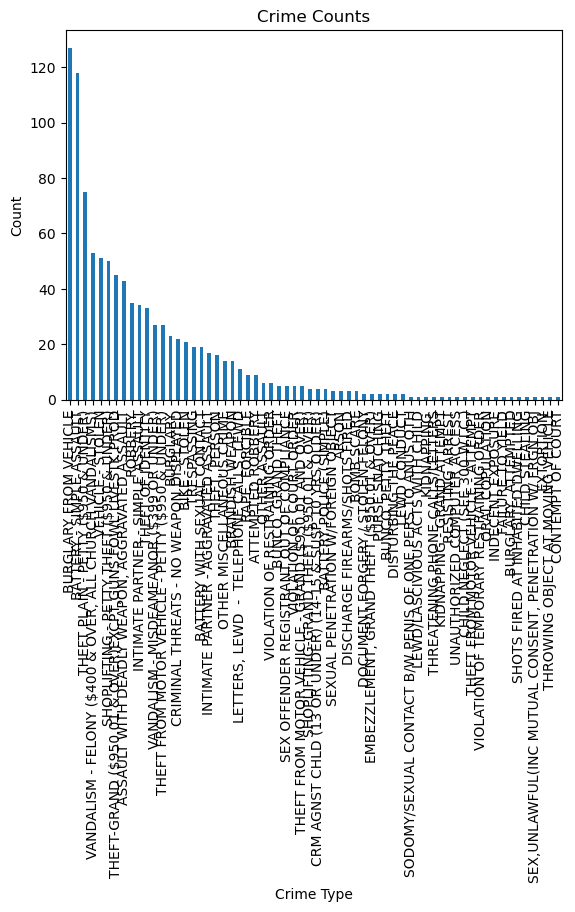

In [23]:
import matplotlib.pyplot as plt

# For example, creating a bar plot of crime counts
crime_counts.plot(kind='bar')
plt.title('Crime Counts')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.show()